<a href="https://colab.research.google.com/github/cdevine2021/Data_Sci/blob/main/Devine_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb
#here we are importing all functions we are gonna need to import our pictures later on in the lab

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# louding images function, getting the slides, plotting the x and y axis so we are able to make our grapgh later, and using the return function.

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();
# we are asssinging labels to this big meaning where it has the key for all the items, and evaluating the model.

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/1gLTxtf3dFjMCgrcghsFTCUyyDsPqf2Al5hrDcFZs_bk/edit#slide=id.p"
# the url for my slides where all of my pictures are located

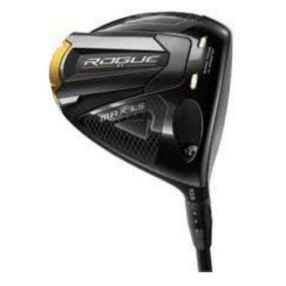

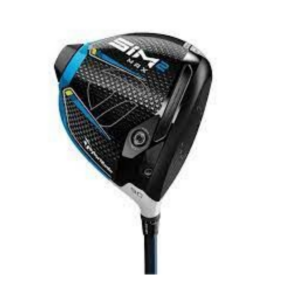

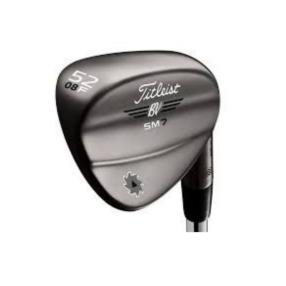

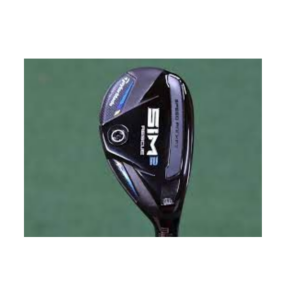

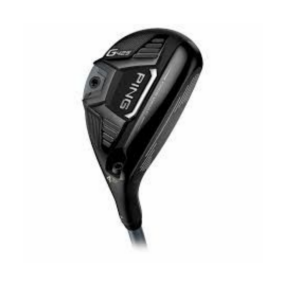

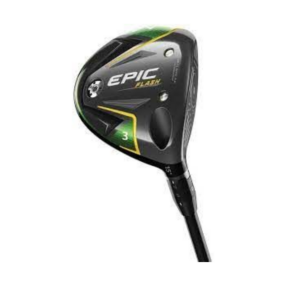

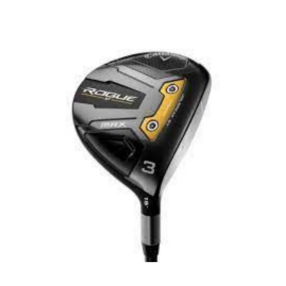

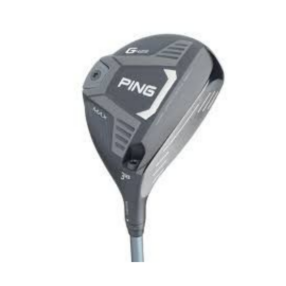

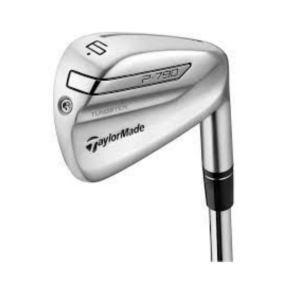

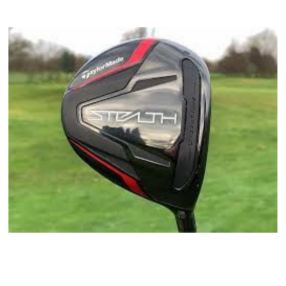

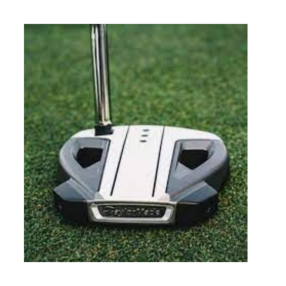

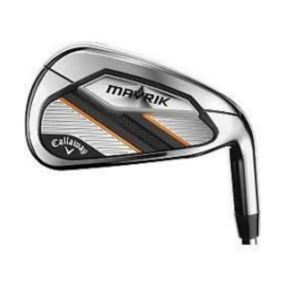

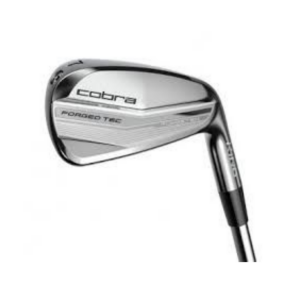

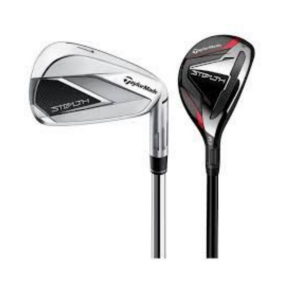

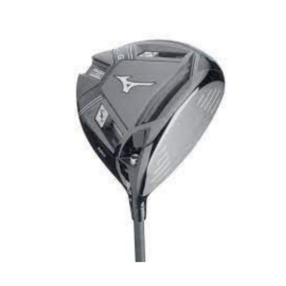

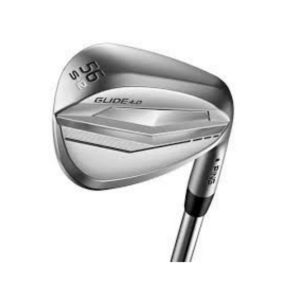

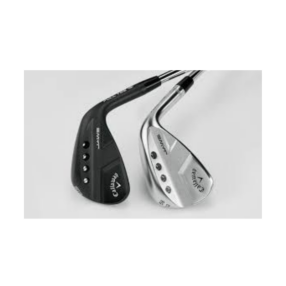

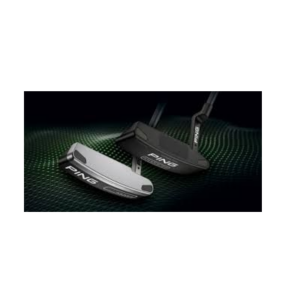

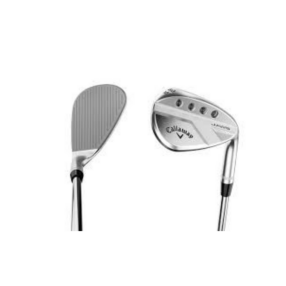

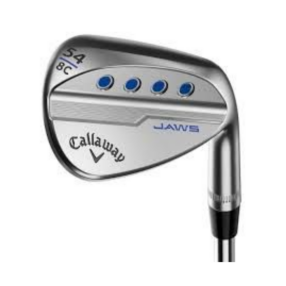

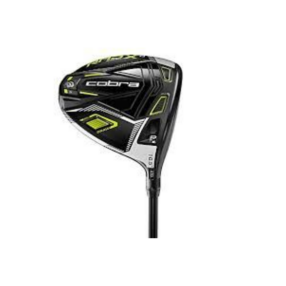

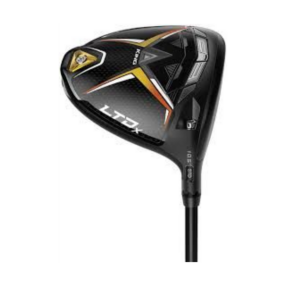

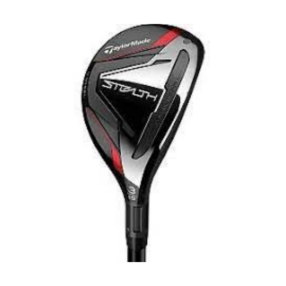

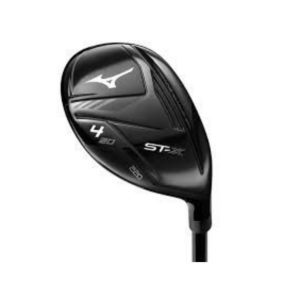

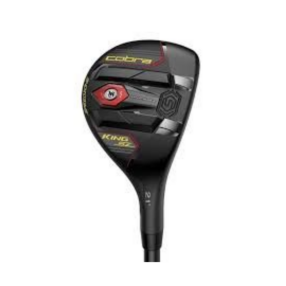

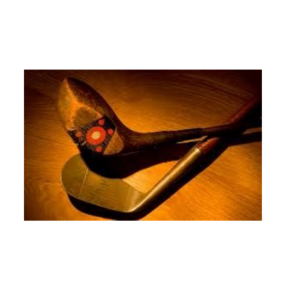

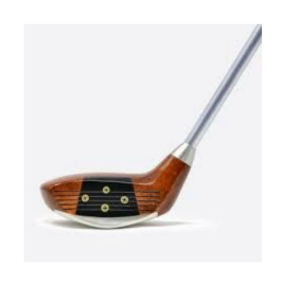

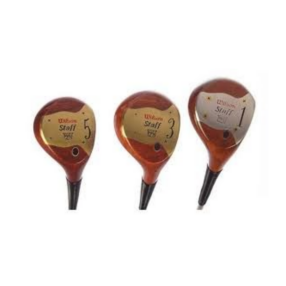

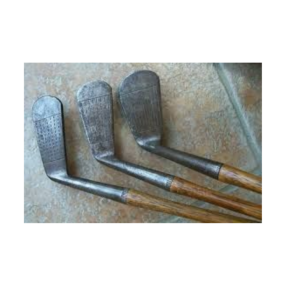

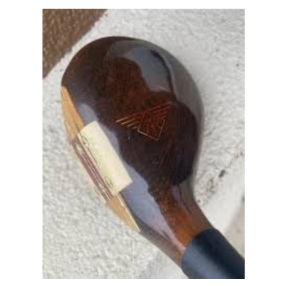

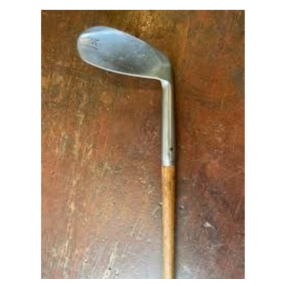

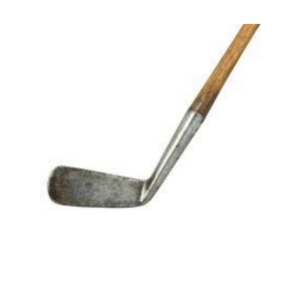

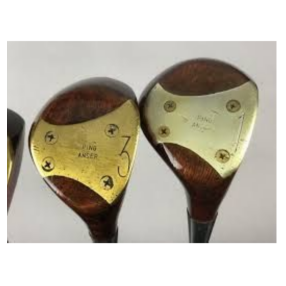

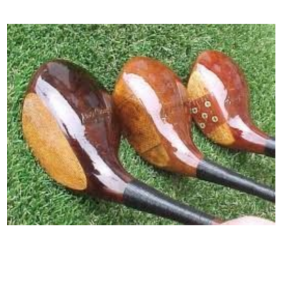

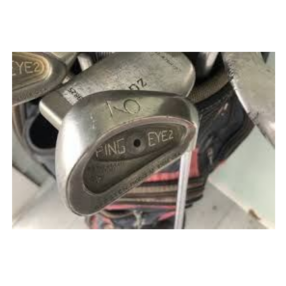

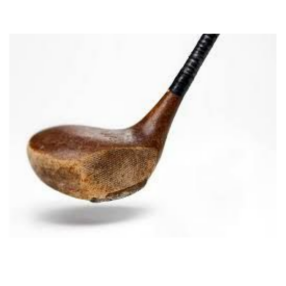

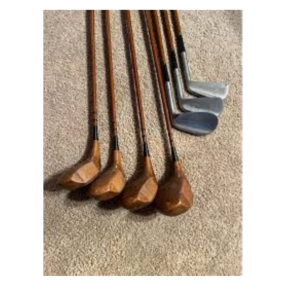

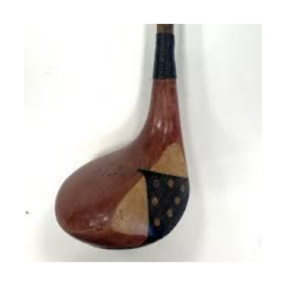

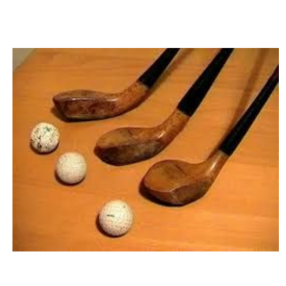

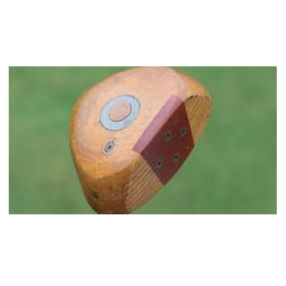

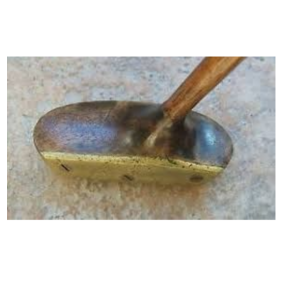

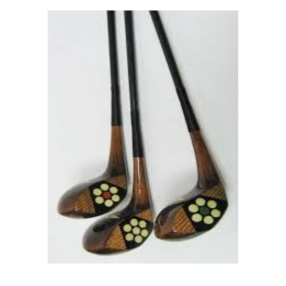

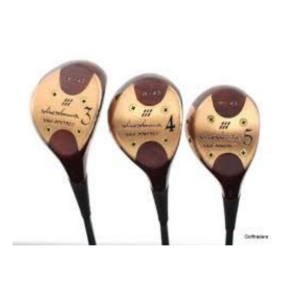

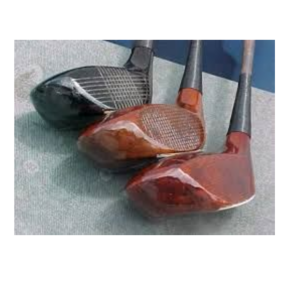

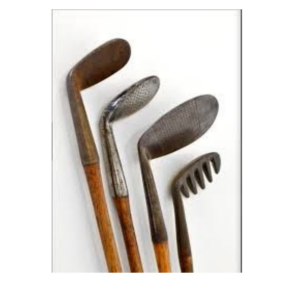

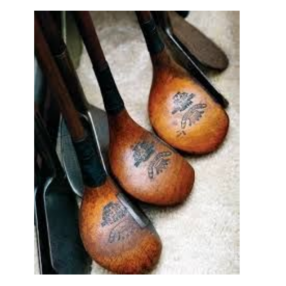

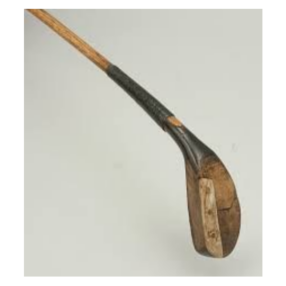

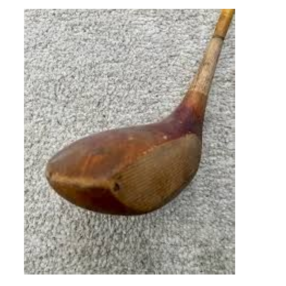

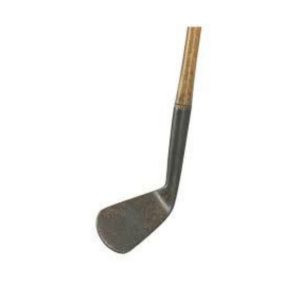

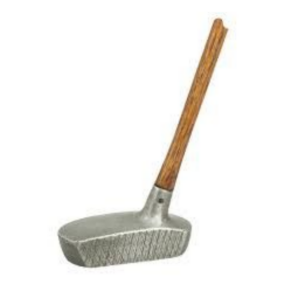

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)
# pulling the images from the slideshow and prestening them onto here to show them

In [6]:
images.shape
#showing the shape of image and the size

torch.Size([50, 3, 224, 224])

In [7]:
model(images)
# creating model(images)

tensor([[-4.7037e-01, -3.7686e+00, -3.1746e+00,  ..., -3.0983e+00,
          9.2739e-01,  5.1758e+00],
        [-3.3016e+00, -4.8973e+00, -2.7234e+00,  ..., -3.1939e+00,
         -5.6445e-01,  5.7198e+00],
        [-1.0139e+00, -3.0436e+00,  7.1678e-02,  ..., -3.1462e-01,
          5.7096e-01,  4.4119e+00],
        ...,
        [ 3.2555e+00,  9.2927e-01,  5.2487e-01,  ...,  4.9561e+00,
          2.9942e+00,  9.5283e-01],
        [-3.2654e-01, -8.7490e-01, -8.1111e-01,  ..., -1.0691e+00,
          4.4017e-01,  3.4050e+00],
        [-2.2861e-03, -1.5001e+00, -3.1603e+00,  ..., -2.4968e+00,
          1.8368e+00,  1.4371e+00]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)
# assigning y to equal model(images)

In [9]:
y.shape
#now just shaping one image with y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()
#creating what the computer guesses my images are

In [11]:
for i in list(guesses):
    print(labels[i])
# printing out all the guesses that the computer has on my images and what it thinks each image that we showed it is

stopwatch, stop watch
stopwatch, stop watch
stopwatch, stop watch
spotlight, spot
stopwatch, stop watch
stopwatch, stop watch
stopwatch, stop watch
stopwatch, stop watch
toaster
stopwatch, stop watch
toaster
cassette player
hard disc, hard disk, fixed disk
hand blower, blow dryer, blow drier, hair dryer, hair drier
hand blower, blow dryer, blow drier, hair dryer, hair drier
crash helmet
buckle
quill, quill pen
hand blower, blow dryer, blow drier, hair dryer, hair drier
stopwatch, stop watch
scale, weighing machine
mortarboard
stopwatch, stop watch
remote control, remote
stopwatch, stop watch
matchstick
spatula
stopwatch, stop watch
pencil sharpener
quill, quill pen
shovel
shovel
clog, geta, patten, sabot
buckeye, horse chestnut, conker
cassette player
electric ray, crampfish, numbfish, torpedo
drum, membranophone, tympan
vase
chime, bell, gong
rubber eraser, rubber, pencil eraser
plane, carpenter's plane, woodworking plane
reel
maraca
cleaver, meat cleaver, chopper
chime, bell, gong
ho

In [12]:
Y = np.zeros(50,)
Y[25:] = 1
# creating Y for use just to be able to pull out one image which is the 25th in this case, with the array of other numbers as well

In [13]:
Y
#just showing what Y is equal to without putting all the stuff after Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy()
#just showing what we have X equal to

In [15]:
X.shape
#X.shape is showing us what the shape of one image is

(50, 1000)

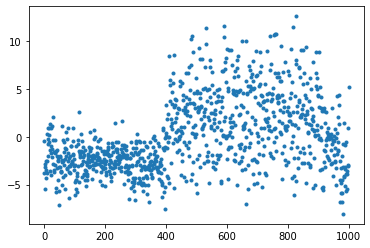

In [16]:
plt.plot(X[0],'.')
# plotting all those numbers from the array of 0

In [17]:
X[0]
#creating another array with X but this time also with all of the numbers from the array of 0

array([-4.70366359e-01, -3.76861501e+00, -3.17459440e+00, -5.45844889e+00,
       -2.88718724e+00, -2.50850105e+00, -4.32380390e+00, -3.46907711e+00,
       -2.57300925e+00, -3.75280023e+00,  3.25143993e-01,  9.24153090e-01,
       -2.12432802e-01, -2.01314473e+00, -7.73563445e-01,  1.48714527e-01,
       -5.60001850e-01,  8.72072041e-01, -1.35447109e+00,  1.38844240e+00,
       -3.54035211e+00, -9.96857703e-01,  9.12219584e-01, -1.66211653e+00,
       -3.98347020e+00,  1.14250338e+00, -2.12846971e+00, -1.27253449e+00,
        2.04754901e+00, -3.25401574e-01, -2.86748147e+00, -3.45781755e+00,
       -1.58458400e+00, -3.65746570e+00, -3.67435634e-01, -2.92583776e+00,
       -1.60220683e+00, -1.71683025e+00, -1.53187037e+00, -5.77897406e+00,
       -5.31592274e+00, -2.02677011e+00, -3.30686378e+00, -1.39823461e+00,
       -2.41095591e+00, -2.51949668e+00, -4.49637127e+00, -2.16589332e+00,
       -7.17558336e+00, -5.71113014e+00, -3.16616988e+00, -2.03169870e+00,
       -2.12016368e+00, -

In [18]:
np.argmax(X[0])
# finding what point in the plot is the highest and then showing the number here

826

In [19]:
labels[826]
#labelling what the 826th image is

'stopwatch, stop watch'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10]
# we are pulling out the top ten numbers from the plot and sorting them

In [21]:
for i in np.argsort(X[0])[::-1][0:10]:
    print(labels[i])
#showing what the labels for the top ten numbers are

stopwatch, stop watch
hand blower, blow dryer, blow drier, hair dryer, hair drier
spotlight, spot
digital watch
reel
remote control, remote
radio, wireless
CD player
printer
hand-held computer, hand-held microcomputer


In [22]:
labels
#pulling out all the labels for my images and showing them here

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 13., 105., 271., 208., 140., 114.,  75.,  42.,  24.,   8.]),
 array([-8.072484 , -6.0037203, -3.9349563, -1.8661926,  0.2025713,
         2.2713351,  4.340099 ,  6.4088626,  8.477627 , 10.546391 ,
        12.615154 ], dtype=float32),
 <a list of 10 Patch objects>)

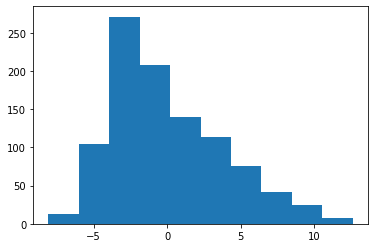

In [23]:
plt.hist(X[0])
# creating a histogram from the same array that we used for our plot grapgh

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)
# assigning X and Y to equal a data set

In [25]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape
#X.shape is showing us what the shape of one image is

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0]
  #creating a model with x and w, then making a return on it with the array of data from 0

In [33]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})
    #making plots by getting the batch of information and testing it with the data before.

In [34]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()
#creating a linear model of our data and labels I was given by the computer. running it to see what our best and worst runs are.

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-9c6a8ece4cdf>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Best run = 0.9688

Worst run = 0.9063

Average of the three runs = 0.9735

